## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process,
where a number of techniques are used to better understand the dataset being used.
Exploratory Data Analysis does two main things:

It helps clean up a dataset.
It gives you a better understanding of the variables and the relationships between them.

The project consists of 3 parts:

   -First part is related to 'data cleaning'     
   -Second part is related to 'filling data'       
   -Third part is related to 'handling outliers of data'

### Importing Libraries Needed in This Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sbn 
sbn.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_json("as24_cars.json")
df = df0.copy()

In [3]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [4]:
df.rename(columns={"make_model" : "Make_Model",
                   "short_description" : "Short_Description", "make" : "Make", "model" : "Model",
                   "location" : "Location",
                   "price" : "Price",
                   "Body type": "Body_Type",
                   "Country version" : "Country_Version",
                   'Offer number' :"Offer_Number",
                   'First registration' :"First_Registration",
                   "Fuel type" : "Fuel_Type",
                   "desc" : "Desc",
                   "seller" : "Seller",
                   "Engine size" : "Engine_Size",
                   "CO₂-emissions" : "CO2_Emissions",
                   "Manufacturer colour" : "Manufacturer_Colour",
                   "Fuel consumption":"Fuel_Consumption",
                   "\nComfort & Convenience\n" : "Comfort_Convenience",
                   "\nEntertainment & Media\n" : "Entertainment_Media",
                   "\nSafety & Security\n" : "Safety_Security",
                   "\nExtras\n" : "Extras",
                   "Empty weight" : "Empty_Weight",
                   "Model code" : "Model_Code",
                   "General inspection" : "General_Inspection",
                   "Last service" : "Last_Service",
                   "Full service history" : "Full_Service_History",
                   "Non-smoker vehicle" : "Non_Smoker_Vehicle",
                   "Emission class" : "Emission_Class",
                   "Emissions sticker" : "Emissions_Sticker",
                   "Upholstery colour" : "Upholstery_Colour",
                   "Production date" : "Production_Date",
                   "Previous owner" : "Previous_Owner",
                   "Other fuel types" : "Other_Fuel_Types",
                   "Power consumption" : "Power_Consumption",
                   "Energy efficiency class" : "Energy_Efficiency_Class",
                   "CO₂-efficiency" : "CO2_Efficiency",
                   "Fuel consumption (WLTP)" : "Fuel_Consumption_WLTP",
                   "CO₂-emissions (WLTP)" : "CO2_Emissions_WLTP",
                   "Available from" : "Available_From",
                   "Taxi or rental car" : "Taxi_Rental_Car",
                   "Last timing belt change" : "Last_Timing_Belt_Change",
                   "Electric Range (WLTP)" : "Electric_Range",
                   "Power consumption (WLTP)" : "Power_Consumption_WLTP",
                   "Battery Ownership" : "Battery_Ownership",
                   },
          inplace = True)

In [5]:
df.columns

Index(['Make_Model', 'Short_Description', 'Make', 'Model', 'Location', 'Price',
       'Body_Type', 'Type', 'Doors', 'Country_Version', 'Offer_Number',
       'Warranty', 'Mileage', 'First_Registration', 'Gearbox', 'Fuel_Type',
       'Colour', 'Paint', 'Desc', 'Seller', 'Seats', 'Power', 'Engine_Size',
       'Gears', 'CO2_Emissions', 'Manufacturer_Colour', 'Drivetrain',
       'Cylinders', 'Fuel_Consumption', 'Comfort_Convenience',
       'Entertainment_Media', 'Safety_Security', 'Extras', 'Empty_Weight',
       'Model_Code', 'General_Inspection', 'Last_Service',
       'Full_Service_History', 'Non_Smoker_Vehicle', 'Emission_Class',
       'Emissions_Sticker', 'Upholstery_Colour', 'Upholstery',
       'Production_Date', 'Previous_Owner', 'Other_Fuel_Types',
       'Power_Consumption', 'Energy_Efficiency_Class', 'CO2_Efficiency',
       'Fuel_Consumption_WLTP', 'CO2_Emissions_WLTP', 'Available_From',
       'Taxi_Rental_Car', 'Availability', 'Last_Timing_Belt_Change',
       'Electric

In [6]:
df.shape

(29480, 58)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               28630 non-null  object 
 1   Short_Description        28630 non-null  object 
 2   Make                     28630 non-null  object 
 3   Model                    28630 non-null  object 
 4   Location                 28630 non-null  object 
 5   Price                    28630 non-null  object 
 6   Body_Type                28630 non-null  object 
 7   Type                     28630 non-null  object 
 8   Doors                    28271 non-null  object 
 9   Country_Version          16889 non-null  object 
 10  Offer_Number             23100 non-null  object 
 11  Warranty                 15784 non-null  object 
 12  Mileage                  28629 non-null  object 
 13  First_Registration       28628 non-null  object 
 14  Gearbox               

### The Examination of Missing Values

In [8]:
df.isnull().sum()

Make_Model                   850
Short_Description            850
Make                         850
Model                        850
Location                     850
Price                        850
Body_Type                    850
Type                         850
Doors                       1209
Country_Version            12591
Offer_Number                6380
Warranty                   13696
Mileage                      851
First_Registration           852
Gearbox                     1098
Fuel_Type                   2637
Colour                      2574
Paint                      14985
Desc                        1433
Seller                       850
Seats                       3975
Power                       1422
Engine_Size                 2253
Gears                      10526
CO2_Emissions              10886
Manufacturer_Colour         7693
Drivetrain                 12587
Cylinders                  10628
Fuel_Consumption            6095
Comfort_Convenience         4047
Entertainm

In [9]:
df.isnull().sum()*100 / df.shape[0]

Make_Model                  2.883311
Short_Description           2.883311
Make                        2.883311
Model                       2.883311
Location                    2.883311
Price                       2.883311
Body_Type                   2.883311
Type                        2.883311
Doors                       4.101085
Country_Version            42.710312
Offer_Number               21.641791
Warranty                   46.458616
Mileage                     2.886703
First_Registration          2.890095
Gearbox                     3.724559
Fuel_Type                   8.945047
Colour                      8.731343
Paint                      50.831072
Desc                        4.860923
Seller                      2.883311
Seats                      13.483718
Power                       4.823609
Engine_Size                 7.642469
Gears                      35.705563
CO2_Emissions              36.926730
Manufacturer_Colour        26.095658
Drivetrain                 42.696744
C

In [10]:
# Droping columns that have missing values more than %80.

In [11]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [12]:
df_nans(df, 80)

Last_Service               93.205563
Other_Fuel_Types           92.154003
Power_Consumption          98.253053
Fuel_Consumption_WLTP      99.660787
CO2_Emissions_WLTP         99.606513
Available_From             98.666893
Taxi_Rental_Car            98.568521
Availability               98.978969
Last_Timing_Belt_Change    98.059701
Electric_Range             99.945726
Power_Consumption_WLTP     99.945726
Battery_Ownership          99.976255
dtype: float64

In [13]:
# Let us check one of them:
column_nans(df["Power_Consumption_WLTP"])

99.94572591587517

### Let us assign the features having missing values more than 80% to an object

In [14]:
drop_columns = df_nans(df, 80).index
drop_columns

Index(['Last_Service', 'Other_Fuel_Types', 'Power_Consumption',
       'Fuel_Consumption_WLTP', 'CO2_Emissions_WLTP', 'Available_From',
       'Taxi_Rental_Car', 'Availability', 'Last_Timing_Belt_Change',
       'Electric_Range', 'Power_Consumption_WLTP', 'Battery_Ownership'],
      dtype='object')

In [15]:
df.drop(drop_columns, axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               28630 non-null  object 
 1   Short_Description        28630 non-null  object 
 2   Make                     28630 non-null  object 
 3   Model                    28630 non-null  object 
 4   Location                 28630 non-null  object 
 5   Price                    28630 non-null  object 
 6   Body_Type                28630 non-null  object 
 7   Type                     28630 non-null  object 
 8   Doors                    28271 non-null  object 
 9   Country_Version          16889 non-null  object 
 10  Offer_Number             23100 non-null  object 
 11  Warranty                 15784 non-null  object 
 12  Mileage                  28629 non-null  object 
 13  First_Registration       28628 non-null  object 
 14  Gearbox               

In [17]:
df.shape

(29480, 46)

### The Examination of Duplicated Values:

In [18]:
# df.duplicated()

# Gives TypeError: unhashable type: 'list'

df.astype(str).duplicated(keep=False).sum()

4384

In [19]:
df[df.astype(str).duplicated(keep=False)]

,Make_Model,Short_Description,Make,Model,Location,Price,Body_Type,Type,Doors,Country_Version,Offer_Number,Warranty,Mileage,First_Registration,Gearbox,Fuel_Type,Colour,Paint,Desc,Seller,Seats,Power,Engine_Size,Gears,CO2_Emissions,Manufacturer_Colour,Drivetrain,Cylinders,Fuel_Consumption,Comfort_Convenience,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Model_Code,General_Inspection,Full_Service_History,Non_Smoker_Vehicle,Emission_Class,Emissions_Sticker,Upholstery_Colour,Upholstery,Production_Date,Previous_Owner,Energy_Efficiency_Class,CO2_Efficiency
579,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
580,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
610,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.0,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
613,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.0,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
839,Mercedes-Benz CLA 45 AMG,4Matic*K

In [20]:
df[df.astype(str).duplicated(['Make_Model', 'Short_Description', 'Location'], keep=False)]['Make_Model'].value_counts(dropna=True)

Volvo C70              690
Volvo V40              678
Volvo XC60             350
Volvo V60              308
Volvo C30              228
                      ... 
Mercedes-Benz V 250      2
Toyota Camry             2
Toyota Avensis           2
Mercedes-Benz S 500      2
Volvo 945                2
Name: Make_Model, Length: 198, dtype: int64

In [21]:
df[df.astype(str)['Make_Model'] == 'Volvo C70']

,Make_Model,Short_Description,Make,Model,Location,Price,Body_Type,Type,Doors,Country_Version,Offer_Number,Warranty,Mileage,First_Registration,Gearbox,Fuel_Type,Colour,Paint,Desc,Seller,Seats,Power,Engine_Size,Gears,CO2_Emissions,Manufacturer_Colour,Drivetrain,Cylinders,Fuel_Consumption,Comfort_Convenience,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Model_Code,General_Inspection,Full_Service_History,Non_Smoker_Vehicle,Emission_Class,Emissions_Sticker,Upholstery_Colour,Upholstery,Production_Date,Previous_Owner,Energy_Efficiency_Class,CO2_Efficiency
26470,Volvo C70,T5 Summum,\nVolvo\n,"[\n, C70 ,\n]","RIO ULLA 15, 28017 MADRID, ES","€ 11,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]","[\n, 7211423, \n]","[\n, 12 months, \n]","199,000 km",03/2006,[\nManual\n],Gasoline,Beige,Metallic,"[Volvo C70 T5 220cv, Marzo 2006 único dueño, 1...",Dealer,"[\n, 4, \n]",[\n162 kW (220 hp)\n],"[\n2,435 cc\n]",[\n6\n],NaN,NaN,"[\n, Front, \n]",[\n5\n],"[[9.1 l/100 km (comb.)], [11.8 l/100 km (city)...","[Air conditioning, Automatic climate control, ...",NaN,"[ABS, Central door lock, Driver-side airbag, F...",[Alloy wheels],"[\n1,711 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26471,Volvo C70,2.4i Momentum,\nVolvo\n,"[\n, C70 ,\n]","Auf dem Sand 28, 40721 Hilden, DE","€ 11,880.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 001731_3386, \n]","[\n, 12 months, \n]","155,923 km",08/2006,[\nManual\n],Super Plus 98,Gold,Metallic,"[ * ABS, * Airbag Fahrerseite, * Airbag auf ...",Dealer,"[\n, 4, \n]",[\n125 kW (170 hp)\n],"[\n2,435 cc\n]",[\n5\n],215 g/km (comb.),ZANZIBAR GOLD PEARL,"[\n, Front, \n]",[\n5\n],"[[9 l/100 km (comb.)], [12.9 l/100 km (city)],...","[Air conditioning, Armrest, Automatic climate ...","[CD player, On-board computer, Radio, Sound sy...","[ABS, Bi-Xenon headlights, Central door lock, ...","[Alloy wheels (18""), Automatically dimming int...","[\n1,685 kg\n]","[\n, 9101/ABY, \n]",New,Yes,NaN,Euro 4,4 (Green),Beige,Part leather,NaN,"[[155,923 km, 08/2006], 2]",F,Calculated on basis of measured CO₂-emissions ...
26472,Volvo C70,2.5T 220PS Cabriolet T5 Summum 1.Hand Xenon,\nVolvo\n,"[\n, C70 ,\n]","Lichterfelder Allee 14, 14513 Teltow, DE","€ 20,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 280, \n]","[\n, Yes, \n]","69,747 km",05/2007,[\nAutomatic\n],Regular/Benzine E10 91,Black,Metallic,[Herzlich Willkommen bei der Autohaus Klann Gm...,Dealer,"[\n, 4, \n]",[\n162 kW (220 hp)\n],"[\n2,521 cc\n]",NaN,234 g/km (comb.),Black Sapphire Metallic,NaN,NaN,"[[9.8 l/100 km (comb.)], [14.7 l/100 km (city)...","[Air conditioning, Armrest, Automatic climate ...","[CD player, On-board computer, Radio, Sound sy...","[ABS, Bi-Xenon headlights, Central door lock, ...","[All season tyres, Alloy wheels, Automatically...",NaN,NaN,04/2024,Yes,Yes,Euro 4,4 (Green),Grey,Full leather,NaN,"[[69,747 km, 05/2007], 1]",NaN,NaN
26473,Volvo C70,2.0 D3 150PS Cabriolet Momentum Automatik,\nVolvo\n,"[\n, C70 ,\n]","Lichterfelder Allee 14, 14513 Teltow, DE","€ 14,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]","[\n, 494-P2, \n]","[\n, Yes, \n]","146,348 km",10/2011,[\nAutomatic\n],Diesel,Blue,Metallic,[Herzlich Willkommen bei der Autohaus Klann Gm...,Dealer,"[\n, 4, \n]",[\n110 kW (150 hp)\n],"[\n1,984 cc\n]",NaN,NaN,CASPIAN BLUE METALLIC,NaN,NaN,NaN,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Central door lock, Driver-side airbag, E...","[All season tyres, Alloy wheels, Automatically...",NaN,NaN,08/2023,Yes,Yes,Euro 5,4 (Green),Black,Part leather,NaN,"[[146,348 km, 10/2011], 1]",NaN,NaN
26474,Volvo C70,2.0D SUMMUM,\nVolvo\n,"[\n, C70 ,\n]",POL. IND. DE CROSS 39600 SANTANDER CANTABRIA E...,"€ 9,900.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]","[\n, 7273637, \n]","[\n, 12 months, \n]","144,000 km",05/2008,[\nM

In [22]:
df[df['Make_Model'] == 'Volvo C70'].astype(str).duplicated(keep=False).value_counts(dropna=False)

True     690
False      2
dtype: int64

In [ ]:
# df.drop_duplicates(keep="first", inplace=True)  ?

### Let's examine and clean all the columns/features one by one

In [23]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

### Price(target column)

In [24]:
first_looking("Price")

column name    :  Price
--------------------------------
per_of_nulls   :  % 2.88
num_of_nulls   :  850
num_of_uniques :  5022
--------------------------------
NaN           850
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: Price, Length: 5022, dtype: int64


In [25]:
df['Price'] = df['Price'].explode().str.strip("€, .-").str.replace(",", "")
df['Price']

0        16950
1        80900
2        69900
3        46990
4        16800
         ...  
29475     5499
29476     7300
29477    29900
29478     4440
29479      NaN
Name: Price, Length: 29480, dtype: object

In [26]:
df['Price']= df['Price'].astype(float)

In [27]:
df.Price.isnull().sum()

850

In [28]:
df.dropna(how='all', inplace=True)

In [29]:
df.Price.isnull().sum()

0

In [30]:
df.Price.describe()

count    2.863000e+04
mean     2.355520e+04
std      2.595371e+04
min      4.900000e+02
25%      1.199000e+04
50%      1.798000e+04
75%      2.799000e+04
max      1.346900e+06
Name: Price, dtype: float64

In [31]:
df['Price'].value_counts(dropna=False)

14990.0    222
12990.0    219
16990.0    186
19990.0    166
9990.0     160
          ... 
19112.0      1
30465.0      1
18461.0      1
22649.0      1
4440.0       1
Name: Price, Length: 5021, dtype: int64

In [32]:
df['Price'].isnull().sum()/df.shape[0] * 100

0.0

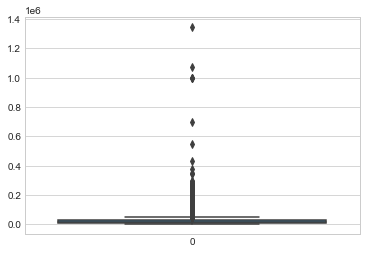

In [33]:
sns.boxplot(df.Price);

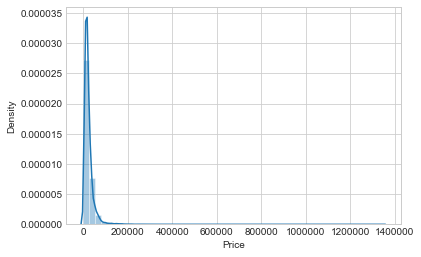

In [34]:
sns.distplot(df.Price)

plt.ticklabel_format(style='plain');

### Make_Model

In [35]:
first_looking("Make_Model")

column name    :  Make_Model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
--------------------------------
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: Make_Model, Length: 611, dtype: int64


In [36]:
df[['Make_Model']]

,Make_Model
0,Mercedes-Benz A 160
1,Mercedes-Benz EQE 350
2,Mercedes-Benz A 45 AMG
3,Mercedes-Benz A 35 AMG
4,Mercedes-Benz A 45 AMG
...,...
29474,Volvo S90
29475,Volvo S40
29476,Volvo C30
29477,Volvo S90


In [37]:
df['Make_Model'].value_counts(dropna=False)

Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: Make_Model, Length: 611, dtype: int64

In [38]:
df['Make_Model'].isnull().sum()/df0.shape[0] * 100

0.0

### Make

In [39]:
first_looking("Make")

column name    :  Make
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: Make, dtype: int64


In [40]:
df["Make"] = df.Make.str.strip('\n')

In [41]:
df.Make.value_counts(dropna=False)

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: Make, dtype: int64

### Model

In [42]:
first_looking("Model")

column name    :  Model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  594
--------------------------------
[\n, Megane ,\n]        863
[\n, Leon ,\n]          787
[\n, V40 ,\n]           740
[\n, Sandero ,\n]       730
[\n, i30 ,\n]           706
                       ... 
[\n, GLA 35 AMG ,\n]      1
[\n, G 55 AMG ,\n]        1
[\n, Ariya ,\n]           1
[\n, 105 ,\n]             1
[\n, 244 ,\n]             1
Name: Model, Length: 594, dtype: int64


In [43]:
df['Model'] = df['Model'].explode().str.strip("\n, ")
df['Model']

0           A 160
1         EQE 350
2        A 45 AMG
3        A 35 AMG
4        A 45 AMG
           ...   
29474         S90
29475         S40
29476         C30
29477         S90
29478         S80
Name: Model, Length: 28630, dtype: object

In [44]:
df.Model.value_counts(dropna=False)

Megane        863
Leon          787
V40           740
Sandero       730
i30           706
             ... 
GLA 35 AMG      1
G 55 AMG        1
Ariya           1
105             1
244             1
Name: Model, Length: 594, dtype: int64

In [45]:
df[['Make_Model', 'Make', 'Model']].sample(10)

,Make_Model,Make,Model
24405,Hyundai i30,Hyundai,i30
28675,Volvo V70,Volvo,V70
13090,SEAT Leon,SEAT,Leon
6163,Renault Captur,Renault,Captur
15799,Dacia Duster,Dacia,Duster
16011,Dacia Duster,Dacia,Duster
18425,Toyota Avensis,Toyota,Avensis
26629,Volvo C70,Volvo,C70
14745,Skoda Superb,Skoda,Superb
27679,Volvo XC90,Volvo,XC90


In [46]:
df.drop(["Model"], axis=1, inplace=True)

In [47]:
df.drop(["Make"], axis=1, inplace=True)

In [48]:
df.shape

(28630, 44)

### Short_Description

In [49]:
first_looking("Short_Description")

column name    :  Short_Description
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20947
--------------------------------
                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: Short_Description, Length: 20947, dtype: int64


In [50]:
df[['Short_Description']]

,Short_Description
0,CDi
1,350+
2,S 4Matic+ 8G-DCT
3,4Matic+ 7G-DCT
4,200CDI BE Line 4M 7G-DCT
...,...
29474,T8 Twin Business Plus AWD Aut.
29475,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen
29476,1.6 D DRIVe Start/Stop R-design
29477,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...


In [51]:
df['Short_Description'].value_counts(dropna=False)

                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: Short_Description, Length: 20947, dtype: int64

In [52]:
df['Short_Description'].isnull().sum()/df0.shape[0] * 100 

0.0

In [53]:
df.drop(['Short_Description'], axis=1, inplace=True)

In [54]:
df.shape

(28630, 43)

### Location

In [55]:
first_looking('Location')

column name    :  Location
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8181
--------------------------------
Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: Location, Length: 8181, dtype: int64


In [56]:
df[['Location']]

,Location
0,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN..."
1,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES"
2,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
3,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES"
4,"CARRIL ARAGONES 4, 30007 CASILLAS, ES"
...,...
29474,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES"
29475,"Stobbeweg 6, 2461 EX TER AAR, NL"
29476,"Sur rendez-vous, 5060 Sambreville, BE"
29477,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL"


In [57]:
df["Location"] = [item.split(",")[-1].strip() if type(item)==str else item for item in df["Location"]]
df["Location"]

0        ES
1        ES
2        ES
3        ES
4        ES
         ..
29474    ES
29475    NL
29476    BE
29477    NL
29478    NL
Name: Location, Length: 28630, dtype: object

In [58]:
df["Location"].value_counts(dropna=False)

DE    12643
ES     6517
NL     2929
IT     2497
BE     1873
FR     1473
AT      660
LU       35
DK        1
EE        1
BG        1
Name: Location, dtype: int64

In [59]:
df['Location'].isnull().sum()/df.shape[0] * 100 

0.0

In [60]:
#Location feature will be kept for finding the answers of some analytical questions, rather than machine learning modelling.

### Body_Type

In [61]:
first_looking('Body_Type')

column name    :  Body_Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
[\n, Station wagon, \n]       5448
[\n, Off-Road/Pick-up, \n]    5415
[\n, Compact, \n]             5387
[\n, Sedan, \n]               5043
[\n, Coupe, \n]               4009
[\n, Convertible, \n]         3328
Name: Body_Type, dtype: int64


In [62]:
df['Body_Type'] = [i[0] if type(i) == list else i for i in df['Body_Type']]
df['Body_Type']

0        \n, Compact, \n
1        \n, Compact, \n
2        \n, Compact, \n
3        \n, Compact, \n
4        \n, Compact, \n
              ...       
29474      \n, Sedan, \n
29475      \n, Sedan, \n
29476      \n, Sedan, \n
29477      \n, Sedan, \n
29478      \n, Sedan, \n
Name: Body_Type, Length: 28630, dtype: object

In [63]:
df["Body_Type"] = df["Body_Type"].str.strip("\n, ")
df['Body_Type']

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29474      Sedan
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
Name: Body_Type, Length: 28630, dtype: object

In [64]:
df['Body_Type'].value_counts(dropna=False)

Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: Body_Type, dtype: int64

In [65]:
df['Body_Type'].isnull().sum()/df0.shape[0] * 100

0.0

### Type

In [66]:
first_looking('Type')

column name    :  Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: Type, dtype: int64


In [67]:
df.Type = [i[0] if type(i) == list else i for i in df['Type']]

In [68]:
df.Type = df['Type'].str.strip("\n, ")

In [69]:
df['Type'].value_counts(dropna=False)

Used              25251
Demonstration      1433
Pre-registered     1377
Employee's car      569
Name: Type, dtype: int64

In [70]:
df['Type'].isnull().sum()/df0.shape[0] * 100

0.0

### Doors

In [71]:
first_looking('Doors')

column name    :  Doors
--------------------------------
per_of_nulls   :  % 1.25
num_of_nulls   :  359
num_of_uniques :  7
--------------------------------
[\n, 5, \n]    17481
[\n, 2, \n]     5523
[\n, 4, \n]     3001
[\n, 3, \n]     2259
NaN              359
[\n, 6, \n]        5
[\n, 1, \n]        2
Name: Doors, dtype: int64


In [72]:
df['Doors'] = [i[0] if type(i) == list else i for i in df['Doors']]
df['Doors']

0        \n, 5, \n
1        \n, 4, \n
2        \n, 5, \n
3        \n, 5, \n
4        \n, 5, \n
           ...    
29474    \n, 4, \n
29475    \n, 4, \n
29476    \n, 3, \n
29477    \n, 4, \n
29478    \n, 4, \n
Name: Doors, Length: 28630, dtype: object

In [73]:
df['Doors'] = df['Doors'].str.strip("\n, ")
df['Doors']

0        5
1        4
2        5
3        5
4        5
        ..
29474    4
29475    4
29476    3
29477    4
29478    4
Name: Doors, Length: 28630, dtype: object

In [74]:
df['Doors']= df['Doors'].astype(float)

In [75]:
df['Doors'].value_counts(dropna=False)

5.0    17481
2.0     5523
4.0     3001
3.0     2259
NaN      359
6.0        5
1.0        2
Name: Doors, dtype: int64

In [76]:
df['Doors'].isnull().sum()/df0.shape[0] * 100

1.217774762550882

### Country_Version

In [77]:
first_looking('Country_Version')

column name    :  Country_Version
--------------------------------
per_of_nulls   :  % 41.01
num_of_nulls   :  11741
num_of_uniques :  26
--------------------------------
NaN                         11741
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, 

In [78]:
df["Country_Version"] = df["Country_Version"].apply(lambda item: item[0].strip(",\n ,") if type(item)==list else item)
df["Country_Version"]

0          Spain
1          Spain
2          Spain
3          Spain
4          Spain
          ...   
29474      Spain
29475        NaN
29476    Belgium
29477        NaN
29478        NaN
Name: Country_Version, Length: 28630, dtype: object

In [79]:
df['Country_Version'].value_counts()

Germany           7939
Spain             6376
Italy              679
Belgium            641
European Union     340
Netherlands        306
Austria            266
France             101
United States       57
Czechia             47
Poland              31
Hungary             21
Denmark             21
Romania             12
Japan               12
Switzerland          9
Luxembourg           9
Sweden               6
Slovenia             5
Slovakia             4
Croatia              3
Bulgaria             1
Malta                1
Canada               1
Mexico               1
Name: Country_Version, dtype: int64

In [80]:
df.drop('Country_Version', axis=1, inplace=True)

In [81]:
df.shape

(28630, 42)

### Offer_Number

In [82]:
first_looking('Offer_Number')

column name    :  Offer_Number
--------------------------------
per_of_nulls   :  % 19.32
num_of_nulls   :  5530
num_of_uniques :  20946
--------------------------------
NaN                                5530
[\n, 1, \n]                          28
[\n, L-Vorlauf 2023, \n]             10
[\n, 30, \n]                          9
[\n, 20, \n]                          9
                                   ... 
[\n, ggp-EP-880-ZS, \n]               1
[\n, 7475319, \n]                     1
[\n, abci-EZ-260-PS_130291, \n]       1
[\n, 7407611, \n]                     1
[\n, 43-JR-LR, \n]                    1
Name: Offer_Number, Length: 20946, dtype: int64


In [83]:
df[['Offer_Number']]

,Offer_Number
0,"[\n, 7468157, \n]"
1,"[\n, 7054863, \n]"
2,"[\n, 7410454, \n]"
3,"[\n, 7464503, \n]"
4,"[\n, 7127931, \n]"
...,...
29474,"[\n, 7449968, \n]"
29475,"[\n, 09-PF-XS, \n]"
29476,NaN
29477,"[\n, 2791, \n]"


In [84]:
df.drop('Offer_Number', axis=1, inplace=True)    

In [85]:
df.shape

(28630, 41)

### Warranty

In [86]:
first_looking('Warranty')

column name    :  Warranty
--------------------------------
per_of_nulls   :  % 44.87
num_of_nulls   :  12846
num_of_uniques :  66
--------------------------------
NaN                     12846
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
                        ...  
[\n, 55 months, \n]         1
[\n, 99 months, \n]         1
[\n, 122 months, \n]        1
[\n, 44 months, \n]         1
[\n, 4 months, \n]          1
Name: Warranty, Length: 66, dtype: int64


In [87]:
df[['Warranty']]

,Warranty
0,"[\n, 24 months, \n]"
1,"[\n, 24 months, \n]"
2,"[\n, 12 months, \n]"
3,"[\n, 12 months, \n]"
4,"[\n, 12 months, \n]"
...,...
29474,"[\n, 12 months, \n]"
29475,NaN
29476,"[\n, 13 months, \n]"
29477,"[\n, 12 months, \n]"


In [88]:
df['Warranty'] = [i[0] if type(i) == list else i for i in df['Warranty']]
df['Warranty']

0        \n, 24 months, \n
1        \n, 24 months, \n
2        \n, 12 months, \n
3        \n, 12 months, \n
4        \n, 12 months, \n
               ...        
29474    \n, 12 months, \n
29475                  NaN
29476    \n, 13 months, \n
29477    \n, 12 months, \n
29478                  NaN
Name: Warranty, Length: 28630, dtype: object

In [89]:
df['Warranty'] = df['Warranty'].str.strip("\n, months")
df['Warranty']

0         24
1         24
2         12
3         12
4         12
        ... 
29474     12
29475    NaN
29476     13
29477     12
29478    NaN
Name: Warranty, Length: 28630, dtype: object

In [90]:
df['Warranty'].value_counts(dropna=False)

NaN    12846
12      9545
Ye      2319
24      1515
60       968
       ...  
55         1
99         1
122        1
44         1
4          1
Name: Warranty, Length: 66, dtype: int64

In [91]:
df.drop('Warranty', axis=1, inplace=True)  

### Mileage

In [92]:
first_looking('Mileage')

column name    :  Mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14184
--------------------------------
10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: Mileage, Length: 14184, dtype: int64


In [93]:
df[['Mileage']]

,Mileage
0,"120,200 km"
1,"5,000 km"
2,"18,900 km"
3,"18,995 km"
4,"197,000 km"
...,...
29474,"40,345 km"
29475,"145,000 km"
29476,"96,000 km"
29477,"94,343 km"


In [94]:
df['Mileage'] = df['Mileage'].str.strip("km").str.replace(",", "").astype('float')
df['Mileage']

0        120200.0
1          5000.0
2         18900.0
3         18995.0
4        197000.0
           ...   
29474     40345.0
29475    145000.0
29476     96000.0
29477     94343.0
29478    230047.0
Name: Mileage, Length: 28630, dtype: float64

In [95]:
df['Mileage'].value_counts(dropna=False)

10.0        586
1.0         172
50.0        133
100.0       119
5000.0      118
           ... 
141589.0      1
59821.0       1
123500.0      1
29781.0       1
230047.0      1
Name: Mileage, Length: 14184, dtype: int64

In [96]:
df['Mileage'].isnull().sum()/df.shape[0] * 100

0.0034928396786587496

### First_Registration

In [97]:
first_looking('First_Registration')

column name    :  First_Registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  656
--------------------------------
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
          ... 
06/1967      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: First_Registration, Length: 656, dtype: int64


In [98]:
df[['First_Registration']]

,First_Registration
0,06/2016
1,06/2022
2,07/2020
3,01/2020
4,09/2015
...,...
29474,08/2019
29475,06/2004
29476,04/2011
29477,11/2017


In [99]:
df['First_Registration'] = df['First_Registration'].str.split("/").str[1].astype('float')
df['First_Registration']

0        2016.0
1        2022.0
2        2020.0
3        2020.0
4        2015.0
          ...  
29474    2019.0
29475    2004.0
29476    2011.0
29477    2017.0
29478    2002.0
Name: First_Registration, Length: 28630, dtype: float64

In [100]:
df.First_Registration.value_counts(dropna = False)

2019.0    3667
2018.0    3492
2022.0    3086
2021.0    2870
2020.0    2473
          ... 
2023.0       1
1929.0       1
1950.0       1
1928.0       1
2202.0       1
Name: First_Registration, Length: 84, dtype: int64

### Production_Date

In [101]:
first_looking('Production_Date')

column name    :  Production_Date
--------------------------------
per_of_nulls   :  % 79.36
num_of_nulls   :  22722
num_of_uniques :  50
--------------------------------
NaN       22722
2019.0     1179
2021.0      980
2022.0      894
2020.0      763
2018.0      762
2017.0      391
2016.0      239
2015.0      118
2014.0       90
2013.0       76
2010.0       53
2012.0       43
2011.0       43
2008.0       34
2009.0       26
2007.0       20
2006.0       17
2002.0       15
2004.0       13
2003.0       13
1967.0       12
2001.0       12
1966.0       11
1999.0        9
2005.0        9
1965.0        9
1970.0        9
1997.0        8
1994.0        8
1968.0        7
2000.0        7
1998.0        5
1990.0        3
1973.0        3
1987.0        3
1993.0        3
1991.0        3
1996.0        3
1995.0        2
1969.0        2
1978.0        2
1982.0        2
1961.0        1
1954.0        1
1988.0        1
1962.0        1
1981.0        1
1985.0        1
1976.0        1
Name: Production_Date, dtype:

In [102]:
df[(df["First_Registration"].notnull()) &\
   (df["Production_Date"].notnull()) &\
   (df["First_Registration"]!=df["Production_Date"])]\
    [["First_Registration","Production_Date"]]

,First_Registration,Production_Date
23,2019.0,2018.0
30,2020.0,2018.0
31,2020.0,2019.0
470,2022.0,2021.0
472,2019.0,2016.0
...,...,...
29350,2019.0,2017.0
29380,2022.0,2021.0
29414,2022.0,2021.0
29426,2020.0,2019.0


In [104]:
# The data used for this project were scraped in 2022.
# I need a new feature 'Age'. Because car age is perhaps the biggest factor in deciding the price of a second-hand car.
# Unless it is a vintage, the older the car, the lower the resale price. 

df['Age'] = 2022 - df['First_Registration']
df['Age']

0         6.0
1         0.0
2         2.0
3         2.0
4         7.0
         ... 
29474     3.0
29475    18.0
29476    11.0
29477     5.0
29478    20.0
Name: Age, Length: 28630, dtype: float64

In [105]:
df.Age.value_counts(dropna=False)

 3.0      3667
 4.0      3492
 0.0      3086
 1.0      2870
 2.0      2473
          ... 
-1.0         1
 93.0        1
 72.0        1
 94.0        1
-180.0       1
Name: Age, Length: 84, dtype: int64

In [106]:
df.drop(["First_Registration", "Production_Date"], axis=1, inplace=True)

In [107]:
df.shape

(28630, 39)

### Gearbox

In [108]:
first_looking('Gearbox')

column name    :  Gearbox
--------------------------------
per_of_nulls   :  % 0.87
num_of_nulls   :  248
num_of_uniques :  4
--------------------------------
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: Gearbox, dtype: int64


In [110]:
df['Gearbox'] = [i[0] if type(i) == list else i for i in df['Gearbox']]
df['Gearbox']

0           \nManual\n
1        \nAutomatic\n
2        \nAutomatic\n
3        \nAutomatic\n
4        \nAutomatic\n
             ...      
29474    \nAutomatic\n
29475    \nAutomatic\n
29476       \nManual\n
29477    \nAutomatic\n
29478    \nAutomatic\n
Name: Gearbox, Length: 28630, dtype: object

In [111]:
df['Gearbox'] = df['Gearbox'].str.strip("\n")
df['Gearbox']

0           Manual
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
29474    Automatic
29475    Automatic
29476       Manual
29477    Automatic
29478    Automatic
Name: Gearbox, Length: 28630, dtype: object

In [112]:
df['Gearbox'].value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: Gearbox, dtype: int64

### Power

In [113]:
first_looking('Power')

column name    :  Power
--------------------------------
per_of_nulls   :  % 2.0
num_of_nulls   :  572
num_of_uniques :  352
--------------------------------
[\n110 kW (150 hp)\n]      1992
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
[\n66 kW (90 hp)\n]        1110
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: Power, Length: 352, dtype: int64


In [115]:
df[['power_kW', 'power_hp']] = df["Power"].apply(lambda item: item[0] if type(item) == list else item)\
                              .str.extract(r'\D*(?P<kW>\d+)\D+(?P<hp>\d+)').astype(float)
df.head(3)

,Make_Model,Location,Price,Body_Type,Type,Doors,Mileage,Gearbox,Fuel_Type,Colour,Paint,Desc,Seller,Seats,Power,Engine_Size,Gears,CO2_Emissions,Manufacturer_Colour,Drivetrain,Cylinders,Fuel_Consumption,Comfort_Convenience,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Model_Code,General_Inspection,Full_Service_History,Non_Smoker_Vehicle,Emission_Class,Emissions_Sticker,Upholstery_Colour,Upholstery,Previous_Owner,Energy_Efficiency_Class,CO2_Efficiency,Age,power_kW,power_hp
0,Mercedes-Benz A 160,ES,16950.0,Compact,Used,5.0,120200.0,Manual,Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
1,Mercedes-Benz EQE 350,ES,80900.0,Compact,Pre-registered,4.0,5000.0,Automatic,Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,215.0,292.0
2,Mercedes-Benz A 45 AMG,ES,69900.0,Compact,Used,5.0,18900.0,Automatic,Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,310.0,421.0


In [116]:
df.power_kW.value_counts(dropna=False)

110.0    1992
96.0     1356
88.0     1182
81.0     1166
66.0     1110
         ... 
746.0       1
570.0       1
471.0       1
179.0       1
26.0        1
Name: power_kW, Length: 352, dtype: int64

In [117]:
df.power_hp.value_counts(dropna=False)

150.0    1992
131.0    1356
120.0    1182
110.0    1166
90.0     1110
         ... 
465.0       1
412.0       1
670.0       1
506.0       1
33.0        1
Name: power_hp, Length: 348, dtype: int64

In [118]:
df.shape

(28630, 41)

In [119]:
df.drop('Power', axis=1, inplace=True)

In [120]:
df.shape

(28630, 40)

### Fuel_Type

In [ ]:
# Another key factor affecting used car prices is fuel economy.

In [121]:
first_looking("Fuel_Type")

column name    :  Fuel_Type
--------------------------------
per_of_nulls   :  % 6.24
num_of_nulls   :  1787
num_of_uniques :  47
--------------------------------
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                    

In [122]:
df["Fuel_Type"].str.split("/").value_counts(dropna=False)

[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
[Regular, Benzine 91]                                                                                         2065
NaN                                                                                                           1787
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                                    

In [123]:
df["Fuel_Type"] = df["Fuel_Type"].str.split("/").str[0].str.strip()
df["Fuel_Type"]

0                          Diesel
1                        Electric
2                        Gasoline
3                        Gasoline
4                          Diesel
                   ...           
29474                         NaN
29475                    Gasoline
29476    Diesel (Particle filter)
29477                    Gasoline
29478                    Super 95
Name: Fuel_Type, Length: 28630, dtype: object

In [124]:
df["Fuel_Type"] = df.Fuel_Type.str.split("(").str[0].str.strip()
df["Fuel_Type"]

0          Diesel
1        Electric
2        Gasoline
3        Gasoline
4          Diesel
           ...   
29474         NaN
29475    Gasoline
29476      Diesel
29477    Gasoline
29478    Super 95
Name: Fuel_Type, Length: 28630, dtype: object

In [126]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others", "Ethanol"]
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in petroleum_gas:
        return "Liquid/Natural Gas"
    else:
        return x

df["Fuel_Type"] = df["Fuel_Type"].apply(fueltype)

In [127]:
df["Fuel_Type"].value_counts(dropna = False)

Benzine               17549
Diesel                 8727
NaN                    1787
Liquid/Natural Gas      379
Electric                188
Name: Fuel_Type, dtype: int64

### Colour

In [ ]:
# Car colour: Popular colours usually garner more attention from potential buyers and therefore are easier to sell.

In [128]:
first_looking("Colour")

column name    :  Colour
--------------------------------
per_of_nulls   :  % 6.02
num_of_nulls   :  1724
num_of_uniques :  15
--------------------------------
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: Colour, dtype: int64


In [129]:
df['Colour'].value_counts(dropna=False)

Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: Colour, dtype: int64

### Manufacturer_Colour

In [130]:
first_looking("Manufacturer_Colour")

column name    :  Manufacturer_Colour
--------------------------------
per_of_nulls   :  % 23.9
num_of_nulls   :  6843
num_of_uniques :  4964
--------------------------------
NaN                               6843
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: Manufacturer_Colour, Length: 4964, dtype: int64


In [131]:
df[['Colour', 'Manufacturer_Colour']].sample(20)

,Colour,Manufacturer_Colour
11494,White,Blanco
12796,Black,Magic Schwarz
24622,Grey,Gris
10996,White,Bianco
12848,Grey,"""Magnetic Tech"""
8036,Blue,Azul
2984,Silver,Gris Plata
2026,Blue,NaN
5210,Black,SCHWARZ MET.
22395,Black,Shadow Black


In [132]:
df[(df["Colour"].isnull()) & (df["Manufacturer_Colour"].notnull())][["Colour", "Manufacturer_Colour"]]

,Colour,Manufacturer_Colour
1,NaN,Negro Obsidiana
24,NaN,GRIS GRAFITO
37,NaN,Plata Iridio
145,NaN,Gris Montagne
169,NaN,Bleu denim métallisé
...,...,...
29434,NaN,Blanc Cristal
29439,NaN,Gris Osmium
29440,NaN,Noir Onyx Métallisé
29441,NaN,Gris Osmium


In [133]:
df.shape

(28630, 40)

In [134]:
df.drop(["Colour", "Manufacturer_Colour"], axis=1, inplace=True)

In [135]:
df.shape

(28630, 38)

### Paint

In [136]:
first_looking("Paint")

column name    :  Paint
--------------------------------
per_of_nulls   :  % 49.37
num_of_nulls   :  14135
num_of_uniques :  3
--------------------------------
Metallic     14494
NaN          14135
Uni/basic        1
Name: Paint, dtype: int64


In [138]:
df['Paint'] = df['Paint'].replace(np.nan, "Uni/basic", regex=True)
df['Paint']

0         Metallic
1        Uni/basic
2        Uni/basic
3        Uni/basic
4         Metallic
           ...    
29474    Uni/basic
29475    Uni/basic
29476     Metallic
29477     Metallic
29478    Uni/basic
Name: Paint, Length: 28630, dtype: object

In [139]:
df['Paint'].value_counts(dropna=False)

Metallic     14494
Uni/basic    14136
Name: Paint, dtype: int64

In [140]:
df.drop("Paint", axis=1, inplace=True)

In [141]:
df.shape

(28630, 37)

### Desc

In [236]:
first_looking("Desc")

column name    :  Desc
--------------------------------
per_of_nulls   :  % 2.04
num_of_nulls   :  583
num_of_uniques :  23242
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [237]:
df.drop('Desc', axis = 1, inplace=True )

### Seller

In [142]:
first_looking("Seller")

column name    :  Seller
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Dealer            26318
Private seller     2312
Name: Seller, dtype: int64


### Seats

In [143]:
first_looking("Seats")

column name    :  Seats
--------------------------------
per_of_nulls   :  % 10.92
num_of_nulls   :  3125
num_of_uniques :  12
--------------------------------
[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3125
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: Seats, dtype: int64


In [144]:
df['Seats'] = [i[0] if type(i) == list else i for i in df['Seats']]
df['Seats']

0              NaN
1        \n, 5, \n
2        \n, 5, \n
3        \n, 5, \n
4        \n, 5, \n
           ...    
29474    \n, 4, \n
29475    \n, 5, \n
29476    \n, 4, \n
29477    \n, 5, \n
29478    \n, 5, \n
Name: Seats, Length: 28630, dtype: object

In [145]:
df['Seats'] = df['Seats'].str.strip("\n ,").astype('float')
df['Seats']

0        NaN
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
29474    4.0
29475    5.0
29476    4.0
29477    5.0
29478    5.0
Name: Seats, Length: 28630, dtype: float64

In [146]:
df['Seats'].value_counts(dropna=False)

5.0     18308
4.0      5390
NaN      3125
2.0      1186
7.0       488
8.0        43
9.0        35
3.0        25
6.0        12
0.0         9
1.0         7
17.0        2
Name: Seats, dtype: int64

### Engine_Size

In [ ]:
# Many cars will have more equipment standard with the larger engine, 
# equipment that would be chargeable extras when the car is ordered with a smaller engine.
# The cost of this equipment is added to the base price of the car.

In [147]:
first_looking("Engine_Size")

column name    :  Engine_Size
--------------------------------
per_of_nulls   :  % 4.9
num_of_nulls   :  1403
num_of_uniques :  468
--------------------------------
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
NaN               1403
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: Engine_Size, Length: 468, dtype: int64


In [148]:
df['Engine_Size'] = df['Engine_Size'].astype(str).str.strip("['\\n, cc\\n']").replace({"a", np.nan})
df['Engine_Size'] = df['Engine_Size'].str.replace(',', '').str.extract('(\d+)').astype("float")
df['Engine_Size']

0           NaN
1           1.0
2        1991.0
3        1991.0
4        2143.0
          ...  
29474    1969.0
29475    2435.0
29476    1560.0
29477    1969.0
29478    2922.0
Name: Engine_Size, Length: 28630, dtype: float64

In [149]:
df.Engine_Size.value_counts(dropna=False)

1598.0    2099
999.0     2068
1969.0    1929
NaN       1403
1461.0    1110
          ... 
2753.0       1
2495.0       1
200.0        1
3224.0       1
2473.0       1
Name: Engine_Size, Length: 468, dtype: int64

### Gears

In [150]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 33.8
num_of_nulls   :  9676
num_of_uniques :  12
--------------------------------
NaN         9676
[\n6\n]     8412
[\n5\n]     5335
[\n7\n]     1738
[\n8\n]     1690
[\n1\n]      712
[\n9\n]      642
[\n4\n]      256
[\n10\n]     112
[\n0\n]       31
[\n3\n]       24
[\n2\n]        2
Name: Gears, dtype: int64


In [151]:
df['Gears'] = [i[0] if type(i) == list else i for i in df['Gears']]

In [152]:
df['Gears'] = df['Gears'].str.strip("\n").astype('float')
df['Gears']

0        NaN
1        9.0
2        8.0
3        7.0
4        7.0
        ... 
29474    8.0
29475    5.0
29476    6.0
29477    8.0
29478    NaN
Name: Gears, Length: 28630, dtype: float64

In [153]:
df.Gears.value_counts(dropna=False)

NaN     9676
6.0     8412
5.0     5335
7.0     1738
8.0     1690
1.0      712
9.0      642
4.0      256
10.0     112
0.0       31
3.0       24
2.0        2
Name: Gears, dtype: int64

### CO2_Emissions

In [154]:
first_looking("CO2_Emissions")

column name    :  CO2_Emissions
--------------------------------
per_of_nulls   :  % 35.05
num_of_nulls   :  10036
num_of_uniques :  348
--------------------------------
NaN                  10036
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: CO2_Emissions, Length: 348, dtype: int64


In [157]:
df["CO2_Emissions"] = df["CO2_Emissions"].astype(str).str.extract('(\d+)').astype("float")
df["CO2_Emissions"]

0          NaN
1          0.0
2          NaN
3          NaN
4          NaN
         ...  
29474      NaN
29475    217.0
29476     99.0
29477    149.0
29478    251.0
Name: CO2_Emissions, Length: 28630, dtype: float64

In [158]:
df["CO2_Emissions"].value_counts(dropna=False)

NaN       10036
0.0        1040
119.0       393
124.0       340
129.0       319
          ...  
3.0           1
1320.0        1
343.0         1
73.0          1
53.0          1
Name: CO2_Emissions, Length: 334, dtype: int64

### Drivetrain

In [ ]:
# An Automotive Drivetrain is a combination of various components that provide power to the vehicle's wheel.
# It is made up of a driveshaft, transmission or gearbox, universal joints, constant velocity joints, wheels,
# and axles. It allows the driver to control the power flow and multiplies the engine torque for 
# controlling the engine speed.Nowadays, demand for automotive powertrains has increased, 
# which is lightweight and thus helps increase fuel efficiency, reduce emissions and improve vehicle performance.

In [159]:
first_looking("Drivetrain")

column name    :  Drivetrain
--------------------------------
per_of_nulls   :  % 41.0
num_of_nulls   :  11737
num_of_uniques :  4
--------------------------------
[\n, Front, \n]    12066
NaN                11737
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: Drivetrain, dtype: int64


In [161]:
df["Drivetrain"] = df["Drivetrain"].explode().str.strip("\n, ")
df["Drivetrain"]

0          NaN
1          NaN
2          4WD
3          4WD
4          4WD
         ...  
29474      4WD
29475    Front
29476    Front
29477      NaN
29478    Front
Name: Drivetrain, Length: 28630, dtype: object

In [162]:
df["Drivetrain"].value_counts(dropna = False)

Front    12066
NaN      11737
4WD       3252
Rear      1575
Name: Drivetrain, dtype: int64

### Cylinders

**The cylinder is an important part of the engine. generates the power of the reciprocating motion of the engine. Most cars have a 4, 6, 8 cylinder engine**

In [163]:
first_looking("Cylinders")

column name    :  Cylinders
--------------------------------
per_of_nulls   :  % 34.15
num_of_nulls   :  9778
num_of_uniques :  13
--------------------------------
[\n4\n]     13068
NaN          9778
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: Cylinders, dtype: int64


In [164]:
df["Cylinders"] = df["Cylinders"].astype(str).str.extract('(\d+)').astype("float")
df["Cylinders"]

0        NaN
1        NaN
2        4.0
3        4.0
4        4.0
        ... 
29474    4.0
29475    5.0
29476    4.0
29477    4.0
29478    6.0
Name: Cylinders, Length: 28630, dtype: float64

In [165]:
df["Cylinders"].value_counts(dropna=False)  

4.0     13068
NaN      9778
3.0      3258
6.0      1013
5.0       799
8.0       539
2.0       103
0.0        35
1.0        21
12.0        8
7.0         6
26.0        1
16.0        1
Name: Cylinders, dtype: int64

### Fuel_Consumption

In [ ]:
# Another key factor is fuel economy. Efficient vehicles tend to hold their value better when gas prices are high,
# while less efficient vehicles (which typically have more cargo space and higher safety ratings) 
# do better when gas is cheap.

In [166]:
first_looking("Fuel_Consumption")

column name    :  Fuel_Consumption
--------------------------------
per_of_nulls   :  % 18.32
num_of_nulls   :  5245
num_of_uniques :  3453
--------------------------------
NaN                                                                            5245
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)

In [168]:
comb = []
city = []
country = []
for i in df['Fuel_Consumption'] :
    if type(i) == list :
            if len(i) == 3 :
                comb.append(i[0])
                city.append(i[1])
                country.append(i[2])
            if len(i) == 2 :
                comb.append(i[0])
                city.append(i[1])
                country.append(np.nan)
            if len(i) == 1 :
                comb.append(i[0])
                city.append(np.nan)
                country.append(np.nan)
    else :
        comb.append(i)
        city.append(i)
        country.append(i)

In [169]:
df['Fuel_Consumption_comb'] = pd.DataFrame(comb)
df['Fuel_Consumption_city'] = pd.DataFrame(city)
df['Fuel_Consumption_country'] = pd.DataFrame(country)

In [170]:
df[['Fuel_Consumption', 'Fuel_Consumption_comb','Fuel_Consumption_city', 'Fuel_Consumption_country' ]].sample(10)

,Fuel_Consumption,Fuel_Consumption_comb,Fuel_Consumption_city,Fuel_Consumption_country
16634,"[[5.1 l/100 km (comb.)], [6.1 l/100 km (city)]...",NaN,NaN,NaN
25505,NaN,[4.5 l/100 km (comb.)],[5.2 l/100 km (city)],[4 l/100 km (country)]
13359,"[[4.7 l/100 km (comb.)], [5.8 l/100 km (city)]...",[4.9 l/100 km (comb.)],[6.1 l/100 km (city)],[4.2 l/100 km (country)]
28545,"[[4.5 l/100 km (comb.)], [5.2 l/100 km (city)]...",[5.8 kg/100 km (comb.)],[8 kg/100 km (city)],[4.5 kg/100 km (country)]
3438,"[[5.7 l/100 km (comb.)], [10.4 l/100 km (city)...",[4.8 l/100 km (comb.)],[5.7 l/100 km (city)],[4.3 l/100 km (country)]
4388,"[[3.5 l/100 km (comb.)], [4.1 l/100 km (city)]...",NaN,NaN,NaN
25615,NaN,[3.8 l/100 km (comb.)],[4.2 l/100 km (city)],[3.6 l/100 km (country)]
4767,"[[4.3 l/100 km (comb.)], [5.3 l/100 km (city)]...",NaN,NaN,NaN
4404,NaN,[6.3 l/100 km (comb.)],[8 l/100 km (city)],[5.3 l/100 km (country)]
21778,"[[12.5 l/100 km (comb.)], [18.9 l/100 km (city...",NaN,NaN,NaN


In [171]:
df['Fuel_Consumption_comb'] = [i[0] if type(i) == list else i for i in df['Fuel_Consumption_comb']]
df['Fuel_Consumption_city'] = [i[0] if type(i) == list else i for i in df['Fuel_Consumption_city']]
df['Fuel_Consumption_country'] = [i[0] if type(i) == list else i for i in df['Fuel_Consumption_country']]

In [172]:
df['Fuel_Consumption_comb'] = df['Fuel_Consumption_comb'].str.extract('(\d{1,2}.\d|\d{1,3})').astype('float')
df['Fuel_Consumption_city'] = df['Fuel_Consumption_city'].str.extract('(\d{1,2}.\d|\d{1,3})').astype('float')
df['Fuel_Consumption_country'] = df['Fuel_Consumption_country'].str.extract('(\d{1,2}.\d|\d{1,3})').astype('float')

In [173]:
df[['Fuel_Consumption', 'Fuel_Consumption_comb','Fuel_Consumption_city', 'Fuel_Consumption_country' ]].sample(20)

,Fuel_Consumption,Fuel_Consumption_comb,Fuel_Consumption_city,Fuel_Consumption_country
3867,"[[4.3 l/100 km (comb.)], [4.7 l/100 km (city)]...",4.7,5.8,4.1
1168,"[[5.7 l/100 km (comb.)], [7.6 l/100 km (city)]...",5.7,7.6,4.7
1338,"[[0 l/100 km (comb.)], [0 l/100 km (city)], [0...",0.0,0.0,0.0
24522,"[[5.2 l/100 km (comb.)], [6 l/100 km (city)], ...",NaN,NaN,NaN
29423,"[[9.1 l/100 km (comb.)], [13.2 l/100 km (city)...",NaN,NaN,NaN
16629,"[[5 l/100 km (comb.)], [5.9 l/100 km (city)], ...",NaN,NaN,NaN
7798,"[[8 l/100 km (comb.)], [11.2 l/100 km (city)],...",7.2,10.0,5.5
21786,"[[12 l/100 km (comb.)], [18.3 l/100 km (city)]...",NaN,NaN,NaN
3786,[[1.5 l/100 km (comb.)]],6.6,NaN,NaN
21490,"[[4.2 l/100 km (comb.)], [5.2 l/100 km (city)]...",NaN,NaN,NaN


In [174]:
df.drop(['Fuel_Consumption','Fuel_Consumption_city', 'Fuel_Consumption_country' ], axis = 1, inplace = True)

In [175]:
df.shape

(28630, 37)

### Comfort_Convenience

In [ ]:
# The external modifications to your vehicle affect the valuation of your vehicle.
# Rust or scratches on the body of the car will lower the car’s market price.
# Similarly, interior condition and features of your car can lead to an increase or decrease in your car’s value.
# Things like a dirty dashboard, scratched seats, blown out speakers, etc. will decrease the price your car can fetch. 
# On the other hand, installing unique features like GPS,
# parking camera, upgraded sound system, etc. will give a boost to your car’s value.

In [176]:
first_looking("Comfort_Convenience")

column name    :  Comfort_Convenience
--------------------------------
per_of_nulls   :  % 11.17
num_of_nulls   :  3197
num_of_uniques :  14439
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                              3197
[Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows]                                                                                                                                                                                                                                                                                              244
[Air condit

In [177]:
df['Comfort_Convenience'] = [i[0] if type(i) == list else i for i in df['Comfort_Convenience']]
df['Comfort_Convenience']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        Air conditioning, Automatic climate control, P...
4        Air conditioning, Electrical side mirrors, Mul...
                               ...                        
29474    Air conditioning, Automatic climate control, M...
29475    Air conditioning, Armrest, Automatic climate c...
29476    Air conditioning, Armrest, Automatic climate c...
29477    Air conditioning, Armrest, Automatic climate c...
29478    Air conditioning, Armrest, Cruise control, Ele...
Name: Comfort_Convenience, Length: 28630, dtype: object

In [178]:
df['Comfort_Convenience'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                            3197
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                                                                                                                                                                                                                                                                                              244
Air conditioning, Automatic climate control, Cruise control                                                                                                                                     

### Entertainment_Media

In [179]:
first_looking("Entertainment_Media")

column name    :  Entertainment_Media
--------------------------------
per_of_nulls   :  % 17.42
num_of_nulls   :  4986
num_of_uniques :  1945
--------------------------------
NaN                                                                                                                                                                          4986
[Bluetooth, USB]                                                                                                                                                              753
[Bluetooth]                                                                                                                                                                   665
[On-board computer]                                                                                                                                                           662
[CD player, On-board computer, Radio]                                                                           

In [180]:
df['Entertainment_Media']= [",".join(item) if type(item) == list else item for item in df['Entertainment_Media']]
df['Entertainment_Media']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      USB
4                           Bluetooth, CD player, MP3, USB
                               ...                        
29474                                       Bluetooth, USB
29475                             On-board computer, Radio
29476    Bluetooth, CD player, Hands-free equipment, MP...
29477    Android Auto, Apple CarPlay, Bluetooth, Hands-...
29478                                    On-board computer
Name: Entertainment_Media, Length: 28630, dtype: object

In [181]:
df['Entertainment_Media'].value_counts(dropna=False).head()

NaN                                    4986
Bluetooth, USB                          753
Bluetooth                               665
On-board computer                       662
CD player, On-board computer, Radio     644
Name: Entertainment_Media, dtype: int64

### Safety_Security

In [182]:
first_looking("Safety_Security")

column name    :  Safety_Security
--------------------------------
per_of_nulls   :  % 11.23
num_of_nulls   :  3215
num_of_uniques :  12550
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            3215
[Isofix]                                                                                                                                                                                                                                                                                                               

In [183]:
df.Safety_Security = [",".join(item) if type(item) == list else item for item in df.Safety_Security]

In [184]:
df['Safety_Security'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3215
Isofix                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Extras

In [185]:
first_looking("Extras")

column name    :  Extras
--------------------------------
per_of_nulls   :  % 17.99
num_of_nulls   :  5150
num_of_uniques :  9361
--------------------------------
NaN                                                                                                                                                                                                                                                                   5150
[Alloy wheels]                                                                                                                                                                                                                                                        3408
[Alloy wheels, Roof rack]                                                                                                                                                                                                                                              380
[Alloy wheels, Sport seats]         

In [186]:
df["Extras"] = [", ".join(item) if type(item) == list else item for item in df["Extras"]]

In [187]:
df['Extras'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                 5150
Alloy wheels                                                                                                                                                                                                                                                        3408
Alloy wheels, Roof rack                                                                                                                                                                                                                                              380
Alloy wheels, Sport seats                                                                                                                                                                                    

### Empty_Weight

In [188]:
first_looking("Empty_Weight")

column name    :  Empty_Weight
--------------------------------
per_of_nulls   :  % 37.97
num_of_nulls   :  10872
num_of_uniques :  1219
--------------------------------
NaN               10872
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,877 kg\n]        1
[\n1,011 kg\n]        1
[\n1,069 kg\n]        1
[\n983 kg\n]          1
[\n1,391 kg\n]        1
Name: Empty_Weight, Length: 1219, dtype: int64


In [189]:
df['Empty_Weight'] = df['Empty_Weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")
df['Empty_Weight']

0           NaN
1           NaN
2           NaN
3           NaN
4        1545.0
          ...  
29474    2077.0
29475    1357.0
29476    1356.0
29477    1617.0
29478    1573.0
Name: Empty_Weight, Length: 28630, dtype: float64

In [190]:
df['Empty_Weight'].value_counts(dropna=False)

NaN       10872
1395.0      233
1055.0      224
1423.0      216
1165.0      200
          ...  
1877.0        1
1011.0        1
1069.0        1
983.0         1
1391.0        1
Name: Empty_Weight, Length: 1219, dtype: int64

### Model_Code

In [191]:
first_looking("Model_Code")

column name    :  Model_Code
--------------------------------
per_of_nulls   :  % 70.78
num_of_nulls   :  20263
num_of_uniques :  2187
--------------------------------
NaN                   20263
[\n, 8212/AFJ, \n]       75
[\n, 1727/AAM, \n]       64
[\n, 1349/AGI, \n]       61
[\n, 1889/ABU, \n]       55
                      ...  
[\n, 7593/ANL, \n]        1
[\n, 1727/ABC, \n]        1
[\n, 4136/AEC, \n]        1
[\n, 4136/668, \n]        1
[\n, 9101/449, \n]        1
Name: Model_Code, Length: 2187, dtype: int64


In [207]:
df0.Model_Code.sample(30)

7194     [\n, 3003/AZR, \n]
15575                   NaN
6131                    NaN
1047     [\n, 0710/431, \n]
6379     [\n, 3333/BPE, \n]
8489     [\n, 3003/ASU, \n]
7623                    NaN
18171    [\n, 5013/AMP, \n]
8549     [\n, 3003/ASU, \n]
26337                   NaN
4530     [\n, 1889/AEQ, \n]
6622                    NaN
374                     NaN
19655                   NaN
12466    [\n, 7593/AHM, \n]
9058     [\n, 3003/AYV, \n]
26711                   NaN
26244                   NaN
25952                   NaN
25676                   NaN
23448    [\n, 8566/BUO, \n]
4329                    NaN
28062                   NaN
4807                    NaN
10493                   NaN
6876                    NaN
6387                    NaN
12184                   NaN
6145     [\n, 3333/BEF, \n]
22479                   NaN
Name: Model_Code, dtype: object

In [192]:
df.shape

(28630, 37)

In [194]:
df.drop("Model_Code", axis=1, inplace=True)

In [195]:
df.shape

(28630, 36)

### General_Inspection

In [196]:
first_looking("General_Inspection")

column name    :  General_Inspection
--------------------------------
per_of_nulls   :  % 57.2
num_of_nulls   :  16376
num_of_uniques :  92
--------------------------------
NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
           ...  
09/2017        1
08/2013        1
08/2020        1
08/2018        1
03/2021        1
Name: General_Inspection, Length: 92, dtype: int64


In [197]:
df.drop("General_Inspection", axis=1, inplace=True)

In [198]:
df.shape

(28630, 35)

### Full_Service_History

In [199]:
first_looking('Full_Service_History')

column name    :  Full_Service_History
--------------------------------
per_of_nulls   :  % 56.11
num_of_nulls   :  16065
num_of_uniques :  2
--------------------------------
NaN    16065
Yes    12565
Name: Full_Service_History, dtype: int64


In [200]:
df["Full_Service_History"].replace(np.nan, "No", inplace=True)

In [201]:
df["Full_Service_History"].value_counts(dropna=False)

No     16065
Yes    12565
Name: Full_Service_History, dtype: int64

### Non_Smoker_Vehicle

In [202]:
first_looking("Non_Smoker_Vehicle")

column name    :  Non_Smoker_Vehicle
--------------------------------
per_of_nulls   :  % 59.5
num_of_nulls   :  17036
num_of_uniques :  2
--------------------------------
NaN    17036
Yes    11594
Name: Non_Smoker_Vehicle, dtype: int64


In [203]:
df["Non_Smoker_Vehicle"].replace(np.nan, "No", inplace=True)

In [228]:
df['Non_Smoker_Vehicle'].value_counts(dropna=False)

NaN    17036
Yes    11594
Name: Non_Smoker_Vehicle, dtype: int64

In [204]:
df.shape

(28630, 35)

In [205]:
df.drop('Non_Smoker_Vehicle', axis = 1, inplace = True)

In [206]:
df.shape

(28630, 34)

### Emission_Class

In [207]:
first_looking('Emission_Class')

column name    :  Emission_Class
--------------------------------
per_of_nulls   :  % 37.62
num_of_nulls   :  10771
num_of_uniques :  10
--------------------------------
NaN             10771
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: Emission_Class, dtype: int64


In [208]:
# Whether your car is Euro 6, Euro 6c, Euro 6d-TEMP, or Euro 6d, the emission amounts are the same.

Euro_6 = ["Euro 6", "Euro 6d-TEMP", "Euro 6d", "Euro 6c"]

def emissionclass(x):
    if x in Euro_6:
        return "Euro 6"
    else:
        return x

df["Emission_Class"] = df["Emission_Class"].apply(emissionclass)

In [209]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: Emission_Class, dtype: int64

In [210]:
df.shape

(28630, 34)

In [211]:
df.drop('Emission_Class', axis = 1, inplace = True)

In [212]:
df.shape

(28630, 33)

### Emissions_Sticker

In [213]:
first_looking('Emissions_Sticker')

column name    :  Emissions_Sticker
--------------------------------
per_of_nulls   :  % 67.12
num_of_nulls   :  19216
num_of_uniques :  5
--------------------------------
NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: Emissions_Sticker, dtype: int64


In [214]:
df['Emissions_Sticker'].value_counts(dropna=False)

NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: Emissions_Sticker, dtype: int64

In [215]:
df.drop('Emissions_Sticker', axis=1, inplace=True)

In [216]:
df.shape

(28630, 32)

### Upholstery_Colour

In [217]:
first_looking('Upholstery_Colour')

column name    :  Upholstery_Colour
--------------------------------
per_of_nulls   :  % 49.11
num_of_nulls   :  14061
num_of_uniques :  12
--------------------------------
NaN       14061
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: Upholstery_Colour, dtype: int64


In [218]:
df['Upholstery_Colour'].value_counts(dropna=False)

NaN       14061
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: Upholstery_Colour, dtype: int64

In [219]:
df.shape

(28630, 32)

In [220]:
df.drop('Upholstery_Colour', axis=1, inplace=True)

In [221]:
df.shape

(28630, 31)

### Upholstery

In [222]:
first_looking('Upholstery')

column name    :  Upholstery
--------------------------------
per_of_nulls   :  % 35.0
num_of_nulls   :  10020
num_of_uniques :  7
--------------------------------
NaN             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: Upholstery, dtype: int64


### Previous_Owner

In [224]:
first_looking('Previous_Owner')

column name    :  Previous_Owner
--------------------------------
per_of_nulls   :  % 51.05
num_of_nulls   :  14615
num_of_uniques :  11734
--------------------------------
NaN                           14615
[[50 km, 06/2022], 1]            64
[[10 km, 08/2022], 1]            59
[[10 km, 07/2022], 1]            45
[[10 km, 09/2022], 1]            38
                              ...  
[[358,000 km, 10/2010], 2]        1
[[165,400 km, 09/2010], 1]        1
[[65,000 km, 10/2006], 1]         1
[[71,000 km, 04/2013], 1]         1
[[230,047 km, 07/2002], 5]        1
Name: Previous_Owner, Length: 11734, dtype: int64


In [226]:
df.drop("Previous_Owner", axis=1, inplace=True)

In [227]:
df.shape

(28630, 30)

### Energy_Efficiency_Class

Energy class is a concept that proves to the consumer how successful an electronic product is in terms of energy efficiency.
Accordingly, the green "A+" icon is on the most economical vehicles; Vehicles with medium fuel consumption will have yellow.The red letter "G" will be found on cars that consume the most fuel.

In [228]:
first_looking("Energy_Efficiency_Class")

column name    :  Energy_Efficiency_Class
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  11
--------------------------------
NaN     20826
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: Energy_Efficiency_Class, dtype: int64


In [230]:
efficient = ["A", "A+", "A++", "A+++", "B"]
unefficient = ["C", "D", "E", "F", "G"]

def energyefficiency(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"    
    else:
        return x

df["Energy_Efficiency_Class"] = df["Energy_Efficiency_Class"].apply(energyefficiency)

In [231]:
df["Energy_Efficiency_Class"].value_counts(dropna=False)

NaN            20826
efficient       5308
unefficient     2496
Name: Energy_Efficiency_Class, dtype: int64

### CO2_Efficiency

In [232]:
first_looking("CO2_Efficiency")

column name    :  CO2_Efficiency
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  2
--------------------------------
NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: CO2_Efficiency, dtype: int64


In [233]:
df.shape

(28630, 30)

In [234]:
df.drop('CO2_Efficiency', axis = 1, inplace = True)

In [238]:
df.shape

(28630, 28)

### Now I can save my cleaned file as in csv format.

In [239]:
display(df.shape)
print(df.index[0], df.index[-1])

df = df.reset_index(drop=True)

display(df.shape)
print(df.index[0], df.index[-1])

(28630, 28)

0 29478


(28630, 28)

0 28629


### I started with 58 columns at the beginning of the analysis, now I have 28 columns.

In [240]:
df.head().T

,0,1,2,3,4
Make_Model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
Location,ES,ES,ES,ES,ES
Price,16950.0,80900.0,69900.0,46990.0,16800.0
Body_Type,Compact,Compact,Compact,Compact,Compact
Type,Used,Pre-registered,Used,Used,Used
Doors,5.0,4.0,5.0,5.0,5.0
Mileage,120200.0,5000.0,18900.0,18995.0,197000.0
Gearbox,Manual,Automatic,Automatic,Automatic,Automatic
Fuel_Type,Diesel,Electric,Benzine,Benzine,Diesel
Seller,Dealer,Dealer,Dealer,Dealer,Dealer


In [241]:
df.to_csv("Autoscout_cleaning.csv", index=False)